In [7]:
import numpy as np
from collections import namedtuple
from matplotlib import pyplot as plt
import json
import os
import pandas as pd

In [8]:
files = [os.path.join('../data/', f) for f in os.listdir('../data/')]
sorted(files, key=lambda x: x.split('_')[3])

['../data/lambda_128_cells_100_bgo9n_l4.json',
 '../data/lambda_256_cells_100_ld577ml5.json',
 '../data/lambda_128_cells_150_5vmih5oz.json',
 '../data/lambda_256_cells_150_u9yer16d.json',
 '../data/lambda_128_cells_200_yekrua_o.json',
 '../data/lambda_256_cells_200_s8m8v9my.json',
 '../data/lambda_256_cells_250_s0jhmn32.json',
 '../data/lambda_128_cells_250_40lmfhh2.json',
 '../data/lambda_128_cells_300_qt36cub6.json']

In [9]:
def parse_filename(filename):
    splt = filename.split('_')
    mem = int(splt[1])
    cells = int(splt[3])
    return dict(
        memory=mem,
        cells=cells
    )

experiments = []

for f in files:
    with open(f, 'r') as fh:
        exp = parse_filename(f)
        js = json.load(fh)
        exp['durations'] = js['durations']
        exp['median'] = np.median(js['durations'])
        experiments += [exp]

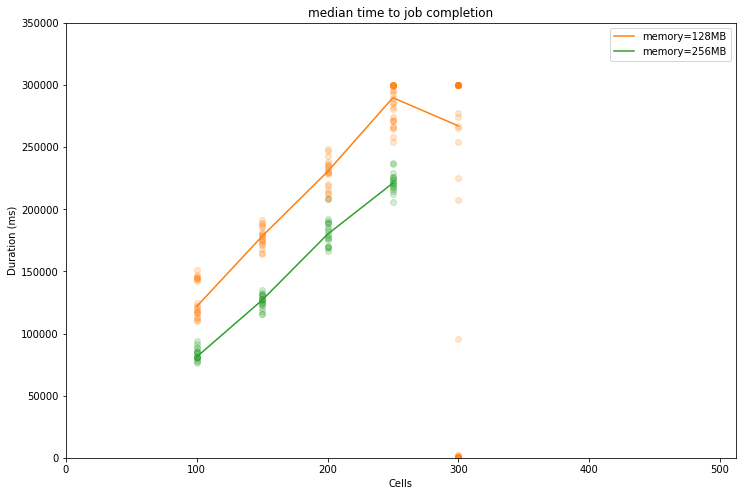

In [15]:
memory = sorted(list(set([exp['memory'] for exp in experiments])))
memory_colors = dict([(count, 'C' + str(num+1)) for num, count in enumerate(memory)])

plt.figure(figsize=(12,8))
def plot_memory(experiments, memory):
    exps = sorted([exp for exp in experiments if exp['memory'] == memory], key=lambda d: d['cells'])
    xs = [float(exp['cells']) for exp in exps]
    ys = [exp['median'] for exp in exps]
    label = 'memory=' + str(memory) + "MB"
    plt.plot(xs, ys, label=label, color=memory_colors[memory])
    
    for exp in exps:
        durations = exp['durations']
        plt.scatter([exp['cells']]*len(durations), durations, color=memory_colors[memory], alpha=0.2)

for mem in memory:
    plot_memory(experiments, mem)

plt.legend(loc='best')
plt.xlim([0, 512])
plt.ylim([0, 350000])
plt.title('median time to job completion')
plt.xlabel('Cells')
plt.ylabel('Duration (ms)')
plt.show()